In [1]:
! wget https://synthetichealth.github.io/synthea-sample-data/downloads/synthea_sample_data_csv_apr2020.zip
! unzip synthea_sample_data_csv_apr2020.zip

--2023-03-18 19:41:16--  https://synthetichealth.github.io/synthea-sample-data/downloads/synthea_sample_data_csv_apr2020.zip
Resolving synthetichealth.github.io (synthetichealth.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to synthetichealth.github.io (synthetichealth.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8982431 (8.6M) [application/zip]
Saving to: ‘synthea_sample_data_csv_apr2020.zip’

synthea_sample_data 100%[===================>]   8.57M  --.-KB/s    in 0.09s   

2023-03-18 19:41:16 (92.0 MB/s) - ‘synthea_sample_data_csv_apr2020.zip’ saved [8982431/8982431]

Archive:  synthea_sample_data_csv_apr2020.zip
   creating: csv/
  inflating: csv/medications.csv     
  inflating: csv/providers.csv       
  inflating: csv/payer_transitions.csv  
  inflating: csv/imaging_studies.csv  
  inflating: csv/supplies.csv        
  inflating: csv/payers.csv          
  inflating: csv/allergies.csv       


In [64]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
os.listdir("csv")

['observations.csv',
 'encounters.csv',
 'immunizations.csv',
 'organizations.csv',
 'payer_transitions.csv',
 'providers.csv',
 'allergies.csv',
 'conditions.csv',
 'medications.csv',
 'careplans.csv',
 'patients.csv',
 'imaging_studies.csv',
 'payers.csv',
 'devices.csv',
 'supplies.csv',
 'procedures.csv']

In [60]:
observations = pd.read_csv("csv/observations.csv")
observations.DATE = pd.to_datetime(observations.DATE)
observations.head()

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2012-01-23 17:45:28+00:00,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,8302-2,Body Height,193.3,cm,numeric
1,2012-01-23 17:45:28+00:00,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,2.0,{score},numeric
2,2012-01-23 17:45:28+00:00,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,29463-7,Body Weight,87.8,kg,numeric
3,2012-01-23 17:45:28+00:00,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,39156-5,Body Mass Index,23.5,kg/m2,numeric
4,2012-01-23 17:45:28+00:00,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,8462-4,Diastolic Blood Pressure,82.0,mm[Hg],numeric


In [11]:
observations.columns

Index(['DATE', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION', 'VALUE', 'UNITS',
       'TYPE'],
      dtype='object')

In [61]:
bmi = observations[observations.DESCRIPTION=="Body Mass Index"].copy()
bmi.VALUE.dtype

dtype('O')

In [62]:
bmi.VALUE = bmi.VALUE.astype(float)
bmi.VALUE.dtype

dtype('float64')

<AxesSubplot:>

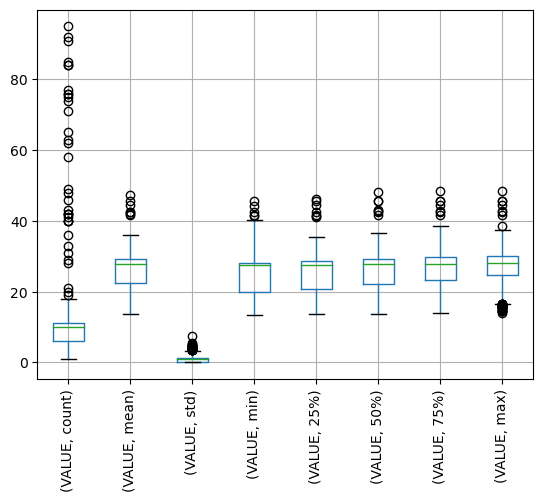

In [54]:
bmi.groupby(by=["PATIENT"]).describe().boxplot(rot=90)

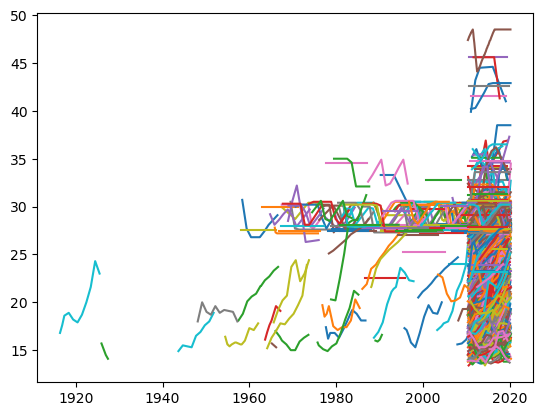

In [72]:
for i in range(bmi.PATIENT.nunique()):
    plt.plot(bmi[bmi.PATIENT==bmi.PATIENT.unique()[i]].DATE, bmi[bmi.PATIENT==bmi.PATIENT.unique()[i]].VALUE)

<AxesSubplot:>

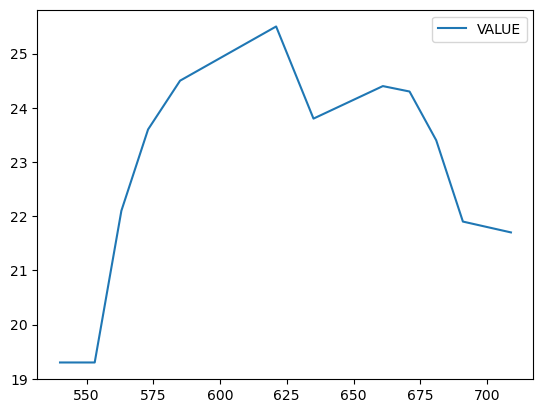

In [100]:
bmi[bmi.PATIENT==bmi.PATIENT.value_counts().index[80]][["VALUE"]].plot()

In [83]:
bmi.PATIENT.nunique()

1134